In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import streamlit as st
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

In [4]:
# Generate synthetic dataset
def generate_data(num_samples=1000):
    data = []
    labels = []
    for _ in range(num_samples):
        room_size = np.random.randint(5, 10, size=2)  # Room dimensions (5x5 to 10x10)
        furniture_count = np.random.randint(1, 5)  # Number of furniture pieces
        furniture = []
        for _ in range(furniture_count):
            w, h = np.random.randint(1, 4, size=2)  # Furniture dimensions
            x, y = np.random.randint(0, room_size[0] - w), np.random.randint(0, room_size[1] - h)
            furniture.append([x, y, w, h])
        data.append([room_size, furniture])
        labels.append(furniture)  # Optimized placement (mocked for now)
    return np.array(data), np.array(labels)

In [5]:
# Preprocess data
def preprocess_data(data, labels):
    X = []
    y = []
    for room_size, furniture in data:
        room_size = room_size / 10.0  # Normalize room dimensions
        furniture = np.array(furniture).flatten() / 10.0  # Normalize furniture positions and dimensions
        X.append(np.concatenate([room_size, furniture]))
        y.append(furniture)
    return np.array(X), np.array(y)

In [6]:
# Create a simple neural network model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(12,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(8, activation='linear')  # Output (x, y, w, h for 2 objects)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [7]:
# Optimization function for furniture placement
def optimize_layout(room_size, furniture):
    def objective(positions):
        # Minimize overlapping and maximize spacing
        penalty = 0
        for i in range(len(furniture)):
            for j in range(i + 1, len(furniture)):
                x1, y1, w1, h1 = positions[i*2], positions[i*2+1], furniture[i][2], furniture[i][3]
                x2, y2, w2, h2 = positions[j*2], positions[j*2+1], furniture[j][2], furniture[j][3]
                if (x1 < x2 + w2 and x1 + w1 > x2 and y1 < y2 + h2 and y1 + h1 > y2):
                    penalty += 100  # High penalty for overlapping
        return penalty

    initial_positions = [f[0] for f in furniture] + [f[1] for f in furniture]
    bounds = [(0, room_size[0] - f[2]) for f in furniture] + [(0, room_size[1] - f[3]) for f in furniture]

    result = minimize(objective, initial_positions, bounds=bounds, method='SLSQP')

    optimized_positions = result.x.reshape(-1, 2)
    for i in range(len(furniture)):
        furniture[i][0], furniture[i][1] = optimized_positions[i]
    return furniture

In [8]:
# Plot layout
def plot_layout(room_size, furniture):
    fig, ax = plt.subplots()
    ax.set_xlim(0, room_size[0])
    ax.set_ylim(0, room_size[1])
    for f in furniture:
        rect = plt.Rectangle((f[0], f[1]), f[2], f[3], edgecolor='blue', fill=True, alpha=0.5)
        ax.add_patch(rect)
    st.pyplot(fig)

In [9]:
# Streamlit UI
def main():
    st.title("AI-Powered Furniture Layout Optimizer")
    room_width = st.slider("Room Width", 5, 10, 7)
    room_height = st.slider("Room Height", 5, 10, 7)
    num_furniture = st.slider("Number of Furniture Items", 1, 5, 3)

    furniture = []
    for i in range(num_furniture):
        x, y = np.random.randint(0, room_width - 2), np.random.randint(0, room_height - 2)
        w, h = np.random.randint(1, 3), np.random.randint(1, 3)
        furniture.append([x, y, w, h])

    optimized_furniture = optimize_layout([room_width, room_height], furniture)

    st.write("Optimized Layout:")
    plot_layout([room_width, room_height], optimized_furniture)

2025-03-12 02:50:40.102 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 02:50:40.269 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-12 02:50:40.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 02:50:40.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 02:50:40.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 02:50:40.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 02:50:40.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 02:50:40.279 Thread 'MainThread': mi

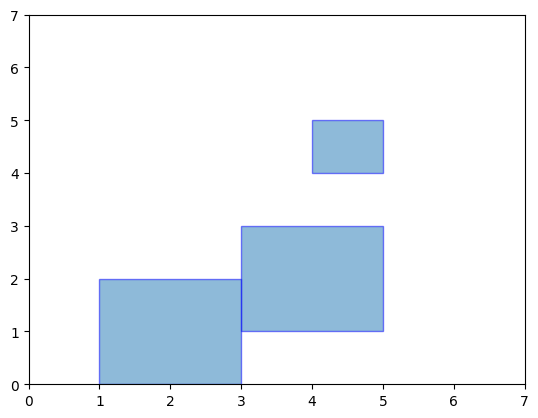

In [10]:
if __name__ == "__main__":
    main()